Our original problem was to analyze current water usage data by watershed, using data from EnviroAtlas (http://enviroatlas.epa.gov/enviroatlas/Datadownload/index.html) Unfortunately, the data became unavailable (due to unanticipated site maintenance) so we had to search for a new data set. We found USGS historic data (1985-2010) that appeared to be fairly clean and showed many of the same variables that the original data offered.

We had thought we had selected just five variables, but it turned out that there were several sub-categories within each of those variables so we ended up with data with more than 80 columns.

In [20]:
import pandas as pd

In [3]:
df=pd.read_csv("CA_Water_Data_no_header.dat",sep="\t")

In [4]:
df

,state_cd,state_name,county_cd,county_nm,year,"Total Population total population of area, in thousands","Public Supply population served by groundwater, in thousands","Public Supply population served by surface water, in thousands","Public Supply total population served, in thousands","Public Supply self-supplied groundwater withdrawals, fresh, in Mgal/d",...,"Irrigation, Crop reclaimed wastewater for crops, in Mgal/d","Irrigation, Golf Courses self-supplied groundwater withdrawals for golf courses, fresh, in Mgal/d","Irrigation, Golf Courses self-supplied surface-water withdrawals for golf courses, fresh, in Mgal/d","Irrigation, Golf Courses total self-supplied withdrawals for golf courses, fresh, in Mgal/d","Irrigation, Golf Courses consumptive use for golf courses, fresh, in Mgal/d","Irrigation, Golf Courses sprinkler irrigation for golf courses, in thousand acres","Irrigation, Golf Courses microirrigation for golf courses, in thousand acres","Irrigation, Golf Courses surface irrigation for golf courses, in thousand acres","Irrigation, Golf Courses total irrigation for golf courses, in thousand acres","Irrigation, Golf Courses reclaimed wastewater for golf courses, in Mgal/d"
0,6,California,1,Alameda County,1985,1195.160,185.950,967.160,1153.110,31.58,...,-,-,-,-,-,-,-,-,-,-
1,6,California,1,Alameda County,1990,1279.180,109.370,1142.440,1251.810,23.83,...,-,-,-,-,-,-,-,-,-,-
2,6,California,1,Alameda County,1995,1347.700,165.830,1162.820,1328.650,31.05,...,-,-,-,-,-,-,-,-,-,-
3,6,California,1,Alameda County,2000,1443.740,152.460,1114.420,1266.880,26.70,...,-,1.23,0.72,1.95,-,2.50,0.00,0.00,2.50,-
4,6,California,1,Alameda County,2005,1448.905,477.712,955.782,1433.494,52.19,...,-,-,-,-,-,-,-,-,-,-
5,6,California,1,Alameda County,2010,1510.271,0.780,1447.920,1448.700,19.01,...,-,0.88,0.52,1.40,-,2.11,0.00,0.00,2.11,1.41
6,6,California,3,Alpine County,1985,1.200,0.430,0.550,0.980,0.07,...,-,-,-,-,-,-,-,-,-,-
7,6,California,3,Alpine County,1990,1.110,0.350,0.250,0.600,0.09,...,-,-,-,-,-,-,-,-,-,-
8,6,California,3,Alpine County,1995,1.170,0.280,0.620,0.900,0.05,...,-,-,-,-,-,-,-,-,-,-
9,6,California,3,Alpine County,2000,1.210,0.150,0.450,0.600,0.06,...,-,0.00,0.00,0.00,-,0.00,0.00,0.00,0.00,-


In [5]:
years=df.groupby("year")

We ran an initial plot with all of the variables over time and quickly learned that there were far too many variables to be able to make any sense of the data all together.

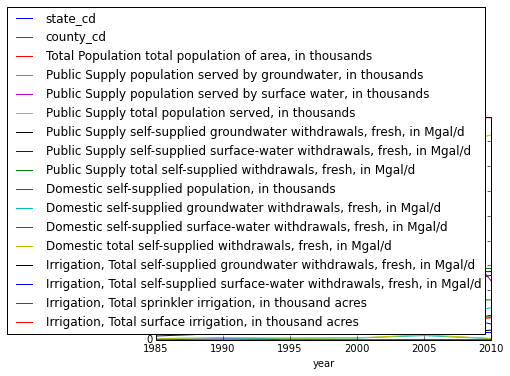

In [6]:
years.median().plot()

We pulled out just two like variables - populations served by groundwater vs. surface water - to plot over time. The results indicated an anomoly in 2005. We hypothesized that may have been a rainy year with more surface water available, but have not yet had a chance to investigate that possibility.

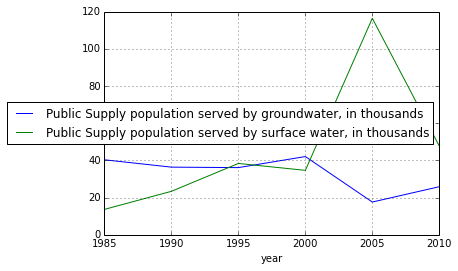

In [7]:
years[["Public Supply population served by groundwater, in thousands"]+["Public Supply population served by surface water, in thousands"]].median().plot()

In [8]:
counties=df.groupby("county_nm")

We were interested in seeing the same data plotted across counties rather than over time.

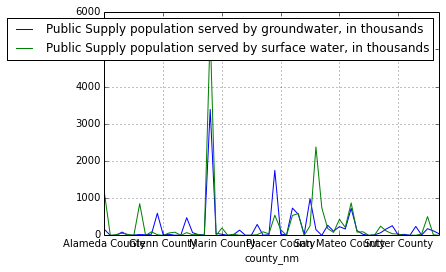

In [9]:
counties[["Public Supply population served by groundwater, in thousands"]+["Public Supply population served by surface water, in thousands"]].median().plot()

First glance at the above graph suggested that Marin County was drawing the most water by far. That didn't make sense because Marin is a rather rural region. We plotted the same data in Excel, which provided a much clearer x-axis that clearly pointed to Los Angeles as the responsible county for the spike. That meshed much better with our understanding of California and pointed to a key limitation within iPython for thisparticular data. There just were too many counties to be able to plot them all in this format - at least with our skill levels.

We then decided that a map would be a better way to examine this data geographically and switched to cartodb.
Our first attempt at importing data failed because there were no recognizable geographic units attached. (The data file we were using had county codes, but CartoDB couldn't recognize them as such without the related state information.)

We found a shapefile for counties on the US census site and uploaded it to CartoDB, using the zip file format directly from the census site.

That map is here: http://cdb.io/1z35YVx

Next, we needed to limit the data to California and tell CartoDB how to merge the geographic data with the variables we wanted to map. We used CartoDB's filter function to limit the data to California (state code 06) and the merge function to connect the data tables on the basis of the county code. Resulting map for public residential water supply by county is here: http://cdb.io/1OrhThC
and irrigation is here: http://cdb.io/1EXMF0N. That is as far as we got on Saturday (see powerpoint for more info)

With 25 years of data, an obvious next step would be to present the change in California water use over time.  With enough additional time, we think we could have done that in Java script, but Dianna was able to continue the project on Sunday in CartoDB and build a series of images that offered a pseudo-time lapse effect.

